In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [86]:
data = pd.read_csv('dataset.csv')

In [90]:
X= data.drop('charges')
y=data['charges']

KeyError: "['charges'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [64]:
# transformer = make_column_transformer((LabelBinarizer(['sex', 'smoker'])), OneHotEncoder(['region']))

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [74]:
numerical_features2=data.select_dtypes(include='number')
numerical_features2

,age,sex,bmi,children,smoker,charges,southwest,southeast,northwest,northeast
0,19,1,27.900,0,1,16884.92400,1,0,0,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0
2,28,0,33.000,3,0,4449.46200,0,1,0,0
3,33,0,22.705,0,0,21984.47061,0,0,1,0
4,32,0,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,1,0,0
1336,21,1,25.800,0,0,2007.94500,1,0,0,0


In [ ]:
for col in numerical_features2:
    data[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
std = StandardScaler()

for col in numerical_features2:
    col_std = std.fit_transform(data[[col]])
    pd.DataFrame(col_std).hist()
    # data[col_std].hist()
    plt.title(col)
    plt.show()

In [ ]:
std = StandardScaler()

for col in numerical_features2:
    col_std=np.log1p(data[col])
    pd.DataFrame(col_std).hist()
    # data[col_std].hist()
    plt.title(col)
    plt.show()

In [ ]:
transformer = make_column_transformer((StandardScaler(),['bmi','children','age']))

In [ ]:
preprocessor = make_pipeline(make_column_transformer())

In [ ]:
preprocessor = LabelBinarizer(['sex', 'smoker']), OneHotEncoder(['region']), MinMaxScaler(['children']), StandardScaler(['bmi']), PolynomialFeatures(degree=2)

# KBinsDiscretizer(n_bins=)


model = make_pipeline(preprocessor, LinearRegression())

params = {
    'polynomial_features__degree':[2,3,4],


}
#np.arange()             np.linspace()
grid = GridSearchCV(model, param_grid=params, cv=4)

In [31]:
unique_region = data['region'].unique()
for region in unique_region:
    data[region]=[1 if line== region else 0 for line in data['region']]

data['smoker']= data['smoker'].apply(lambda x:1 if x=='yes' else 0)
data['sex']= data['sex'].apply(lambda x:1 if x=='female' else 0)

data.head()

,age,sex,bmi,children,smoker,region,charges,southwest,southeast,northwest,northeast
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,1,0


In [32]:
X = data.drop(['region', 'charges'], axis=1)

In [33]:
X.head()

,age,sex,bmi,children,smoker,southwest,southeast,northwest,northeast
0,19,1,27.900,0,1,1,0,0,0
1,18,0,33.770,1,0,0,1,0,0
2,28,0,33.000,3,0,0,1,0,0
3,33,0,22.705,0,0,0,0,1,0
4,32,0,28.880,0,0,0,0,1,0


In [34]:
y = data[['charges']]

In [35]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=69)

In [44]:
model = LinearRegression()
cross_val_score(LinearRegression(),X_train,Y_train, cv=20).mean()
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)
# model.score(X_test,Y_test)

np.float64(0.7317139329594744)

In [55]:
model = LinearRegression()
# model.fit(X_train,Y_train)
N, train_score, val_score = learning_curve(model, X_train, Y_train,train_sizes=np.linspace(0.2,1,5), cv=20,random_state=69,)

print(N)


[ 203  406  609  812 1016]


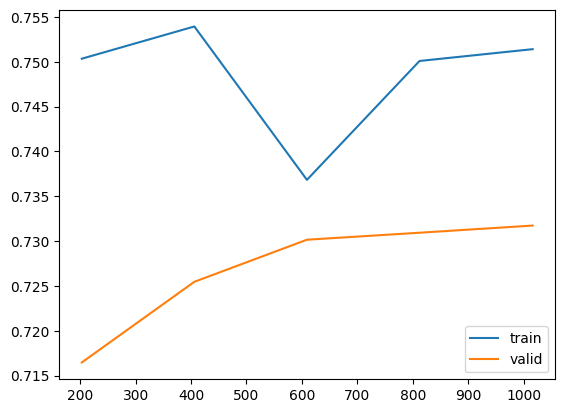

In [56]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='valid')
plt.legend()